<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Funciones básicas para manejo de imágenes </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/openCV.jpg" align="middle" style="width:550px;"/></td>
<td>

**OpenCV** es una biblioteca libre desarrollada originalmente por Intel. Vio la luz en el año 1999. Escrita originalmente en C/C++, su mejor virtud es que es multiplataforma, se puede ejecutar en diferentes sistemas operativos (Linux, Windows, Mac OS X, Android e iOS). También la podemos utilizar en diferentes lenguajes de programación como Java, Objective C, C# y *Python*.

Quizás sea la biblioteca de visión artificial más importante y más usada. Es utilizada por universidades, empresas y gente del movimiento Maker para dar rienda suelta a su imaginación al tratarse de un software libre.

En este notebook comenzaremos con el tratamiento de imágenes en Python mediante esta librería, más específicamente vamos a ver como cargar o  leer una imagen, conversión a blanco y negro, filtros y otras operaciones que serán útiles dentro del curso.


   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [69]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Parte 1

## 1. Abrir una imagen

### 1.1 "Hola mundo“ (Método oficial)

In [70]:
# Al ejecutar esta celda se abre una ventana externa, es necesario cerrar esa ventana
# para continuar la ejecución de las siguientes celdas.

img = cv.imread('figuras/paisaje.jpg')
cv.imshow('Paisaje', img)
cv.waitKey(0)
cv.destroyAllWindows()


### 1.2 "Hola mundo“ (Recomendado para openCV en Jupyter)

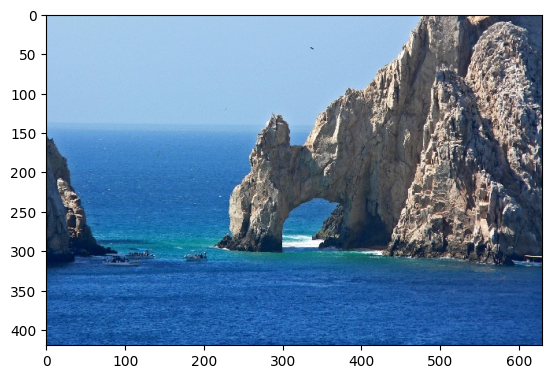

In [71]:
img = cv.imread('figuras/paisaje.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Convertir de BGR a RGB
plt.imshow(img)
plt.show()

In [72]:
img.shape # Dimensiones de la imagen (filas, columnas, canales)

(420, 630, 3)

## 2. Conversión a escala de grises en openCV 

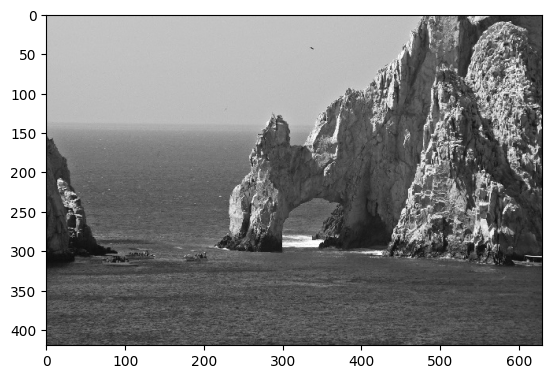

In [73]:
img = cv.imread('figuras/paisaje.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [74]:
img_gray.shape # Dimensiones de la imagen en escala de grises (filas, columnas) # Sin canal de color

(420, 630)

In [75]:
img.shape # Dimensiones de la imagen (filas, columnas, canales) # Con canal de color

(420, 630, 3)

## 3.Modificando partes de una imagen

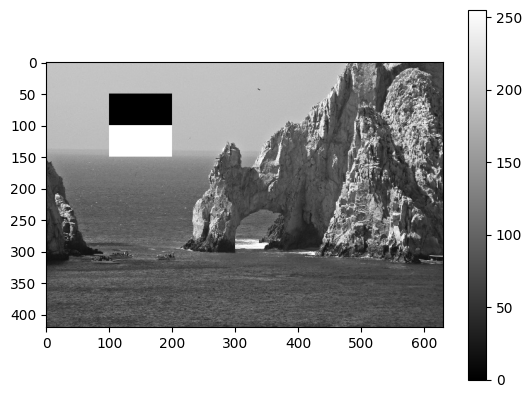

In [76]:
img = cv.imread('figuras/paisaje.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray[50:100, 100:200] = 0 # Cambiar el valor del píxel a 0 (Negro) Fila 50 a 100 y olumna 100 a 200
img_gray[100:150, 100:200] = 255
plt.imshow(img_gray, cmap='gray')
plt.colorbar()
plt.show()
## print(img_gray[50, 100:200]) # Valor del píxel en la fila 50, columnas 100 a 200

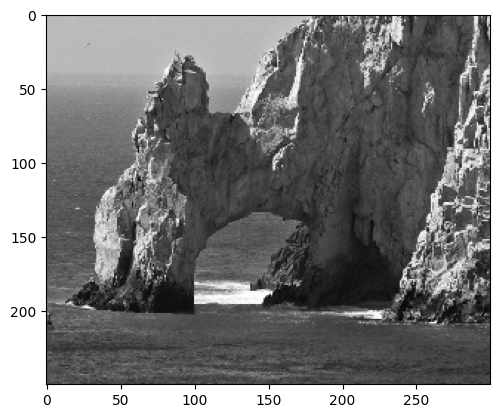

In [77]:

arco = img_gray[100:350, 200:500] #Recorte de imagen
plt.imshow(arco, cmap='gray')
plt.show()

## 4. Filtros

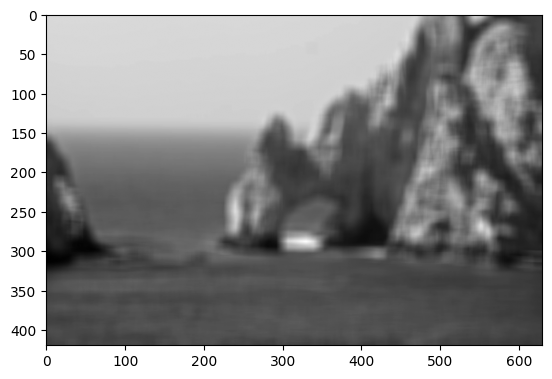

In [78]:
img = cv.imread('figuras/paisaje.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filtro_media = cv.blur(img_gray,(15,15)) # Aplicar filtro media desenfocado

plt.imshow(filtro_media, cmap='gray')
plt.show()

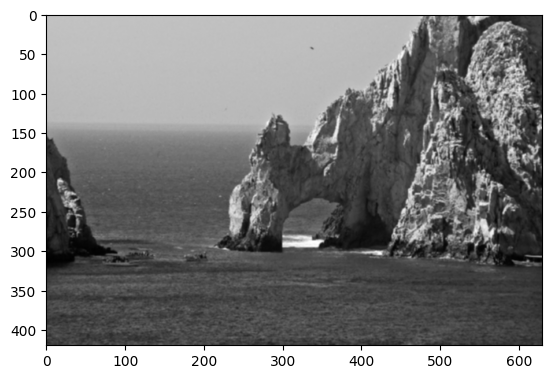

In [79]:
img = cv.imread('figuras/paisaje.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filtro_gauss = cv.GaussianBlur(img_gray,(3,3),0) # Aplicar filtro gaussiano resaltar bordes

plt.imshow(filtro_gauss, cmap='gray')
plt.show()

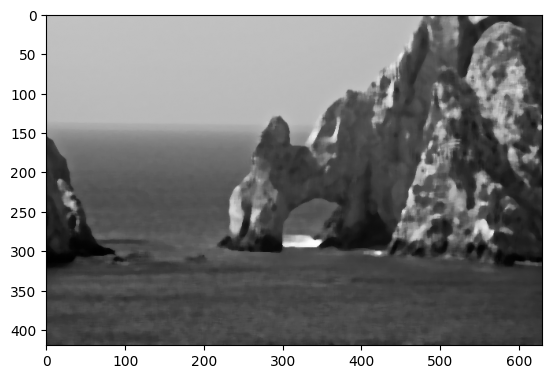

In [80]:
img = cv.imread('figuras/paisaje.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filtro_mediana = cv.medianBlur(img_gray,(7)) # Aplicar filtro mediana (eliminar ruido con suavizado de imagen)

plt.imshow(filtro_mediana, cmap='gray')
plt.show()

### 4.1 Ejemplo de aplicación del filtro Mediana

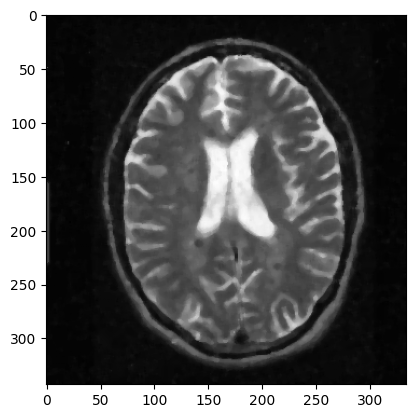

In [81]:
img = cv.imread('figuras/cerebro.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filtro_mediana = cv.medianBlur(img_gray,(5)) # Aplicar filtro mediana

plt.imshow(filtro_mediana, cmap='gray')
plt.show()

## 5. Thresholding 

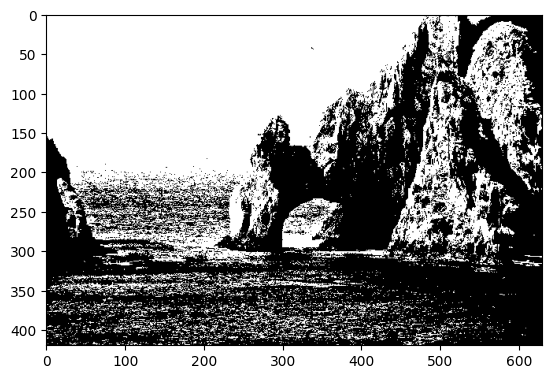

In [82]:
img = cv.imread('figuras/paisaje.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filtro_threshold = cv.threshold(img_gray, 95, 255, cv.THRESH_BINARY) # Aplicar umbralización binaria (devuelve una tupla) 
plt.imshow(filtro_threshold[1], cmap='gray')
plt.show()

## 6. Resize o cambio de tamaño

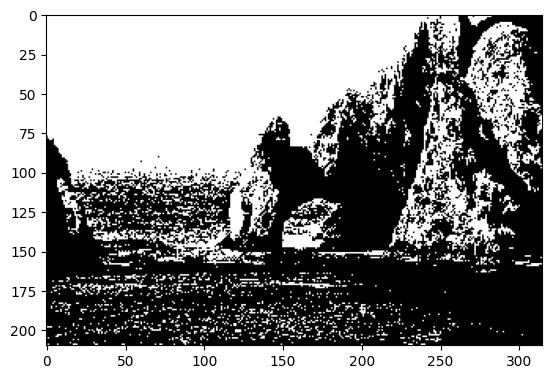

In [83]:
img = cv.imread('figuras/paisaje.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filtro_threshold = cv.threshold(img_gray, 100, 255, cv.THRESH_BINARY) # Aplicar umbralización binaria (devuelve una tupla) [1] es la imagen umbralizada

fraccion = 0.5 # Fracción del tamaño original
alto = int(img_gray.shape[0] * fraccion) # Calcular el nuevo alto [0] son las filas
ancho = int(img_gray.shape[1] * fraccion) # Calcular el nuevo ancho [1] son las columnas

img_resize = cv.resize(filtro_threshold[1], (ancho, alto), interpolation=cv.INTER_NEAREST) # yRedimensionar la imagen a 600x400
plt.imshow(img_resize, cmap='gray')
plt.show()

## 7. Todas las operaciones

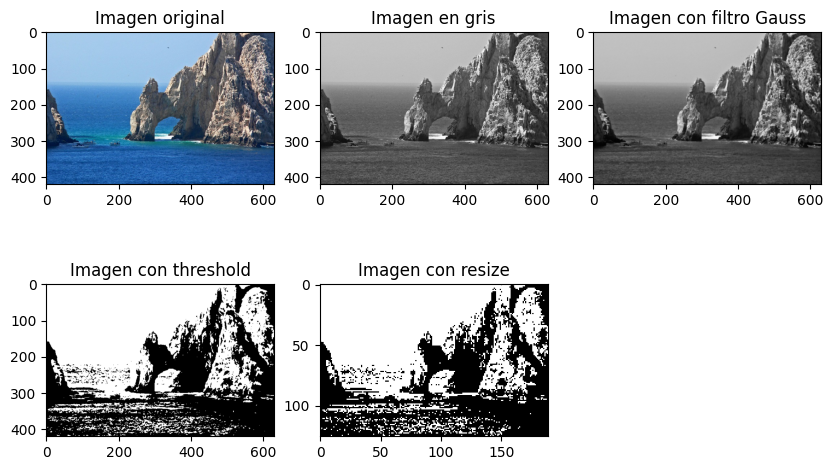

In [84]:
img = cv.imread('figuras/paisaje.jpg')
img= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_gauss=cv.GaussianBlur(img_gray ,(3,3),0)
_, img_thr = cv.threshold( img_gauss,90,255,cv.THRESH_BINARY)

alto=img_thr.shape[0]
ancho=img_thr.shape[1]
ratio=0.30
#cv.resize(Imagen,(ancho,alto), interpolation=cv.INTER_NEAREST)
img_resize = cv.resize(img_thr,(int(ancho*ratio),int(alto*ratio)), interpolation=cv.INTER_NEAREST)

plt.figure(figsize=(10,6))
#imagen original
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Imagen original")
#imagen en gris
plt.subplot(2,3,2)
plt.imshow(img_gray,cmap='gray')
plt.title("Imagen en gris")
#imagen en gaus
plt.subplot(2,3,3)
plt.imshow(img_gauss,cmap='gray')
plt.title("Imagen con filtro Gauss")
#Imagen con threshold
plt.subplot(2,3,4)
plt.imshow(img_thr,cmap='gray')
plt.title("Imagen con threshold")
#Imagen resize
plt.subplot(2,3,5)
plt.imshow(img_resize,cmap='gray')
plt.title("Imagen con resize")
plt.show()

## Tarea

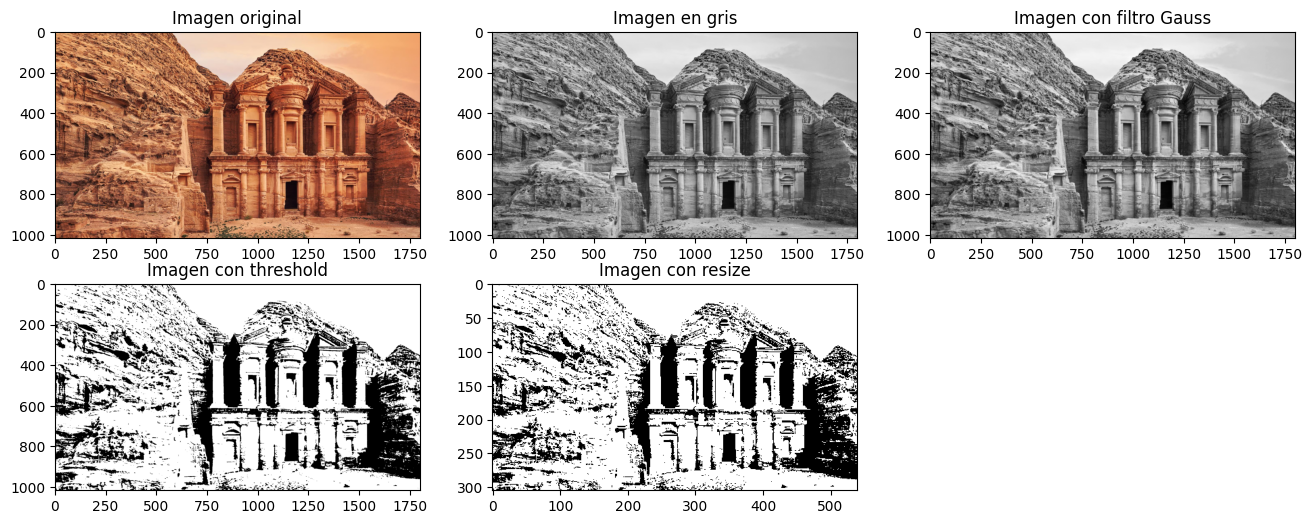

In [85]:
img = cv.imread('figuras/ciudad_petra.jpg')
img= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_gauss=cv.GaussianBlur(img_gray ,(3,3),0)
_, img_thr = cv.threshold( img_gauss,90,255,cv.THRESH_BINARY)

alto=img_thr.shape[0]
ancho=img_thr.shape[1]
ratio=0.30
#cv.resize(Imagen,(ancho,alto), interpolation=cv.INTER_NEAREST)
img_resize = cv.resize(img_thr,(int(ancho*ratio),int(alto*ratio)), interpolation=cv.INTER_NEAREST)

plt.figure(figsize=(16,6))
#imagen original
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Imagen original")
#imagen en gris
plt.subplot(2,3,2)
plt.imshow(img_gray,cmap='gray')
plt.title("Imagen en gris")
#imagen en gaus
plt.subplot(2,3,3)
plt.imshow(img_gauss,cmap='gray')
plt.title("Imagen con filtro Gauss")
#Imagen con threshold
plt.subplot(2,3,4)
plt.imshow(img_thr,cmap='gray')
plt.title("Imagen con threshold")
#Imagen resize
plt.subplot(2,3,5)
plt.imshow(img_resize,cmap='gray')
plt.title("Imagen con resize")
plt.show()

Text(0.5, 1.0, 'Imagen con filtro mediana')

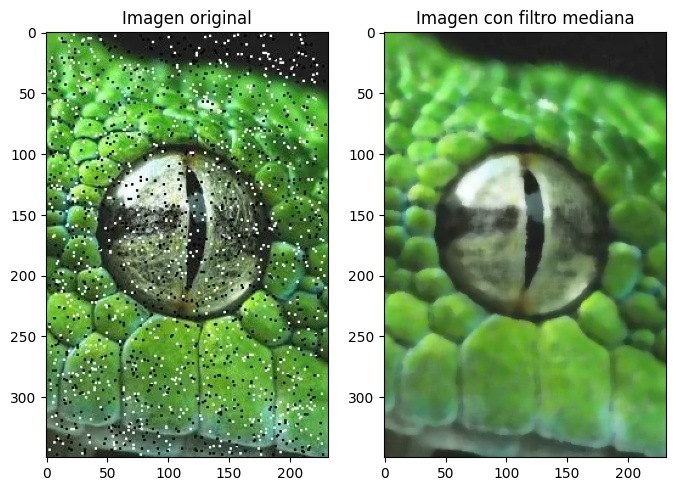

In [90]:
img = cv.imread('figuras/reptil_ojo.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8,12))
#imagen original
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Imagen original")

#imagen con filtro mediana
plt.subplot(1,2,2)
filtro_mediana = cv.medianBlur(img,(7)) # Aplicar filtro mediana
plt.imshow(filtro_mediana, cmap='gray')
plt.title("Imagen con filtro mediana")